<a href="https://colab.research.google.com/github/tavissiva/DeepLizard-ML-Tutorials/blob/master/Simple_tf_Keras_Notes_DeepLizard_Tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Data Preparation & Processing*


In [1]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
X_train_sample = []
y_train_label = []

Example data:


*   An experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial
*   The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older
*   95% of patients 65 or older experienced side effects from the drug
*   95% of patients under 65 experienced no side effects


In [3]:
# Generatin random example data

#5% data
for i in range(50):
  #5% of patients under 65 who did experienced side effects
  random_younger = np.random.randint(13,64)
  X_train_sample.append(random_younger)
  y_train_label.append(1)

  #5% of patients above 65 who did not experienced side effects
  random_older = np.random.randint(64,100)
  X_train_sample.append(random_older)
  y_train_label.append(0)

#95% data
for i in range(1000):
  #95% of patients under 65 who did not experienced side effects
  random_younger = np.random.randint(13,64)
  X_train_sample.append(random_younger)
  y_train_label.append(0)

  #95% of patients above 65 who did experienced side effects
  random_older = np.random.randint(64,100)
  X_train_sample.append(random_older)
  y_train_label.append(1)



```
for i in X_train_sample:
  print(i, end=", ")
for i in y_train_label:
  print(i, end=", ")
```



In [4]:
# Shuffling data
X_train_sample = np.array(X_train_sample)
y_train_label = np.array(y_train_label)

X_train_sample, y_train_label = shuffle(X_train_sample, y_train_label)

In [5]:
#scaling down the train_sample between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
X_train_sample = scaler.fit_transform(X_train_sample.reshape(-1,1))
print(X_train_sample)

[[0.13953488]
 [0.76744186]
 [0.39534884]
 ...
 [0.01162791]
 [0.68604651]
 [0.81395349]]


In [6]:
#Test Label Generator
X_test_sample = []
y_test_label = []

for i in range(5):
  random_younger = np.random.randint(13,64)
  X_test_sample.append(random_younger)
  y_test_label.append(1)

  random_older = np.random.randint(64,100)
  X_test_sample.append(random_older)
  y_test_label.append(0)

#95% data
for i in range(50):
  random_younger = np.random.randint(13,64)
  X_test_sample.append(random_younger)
  y_test_label.append(0)

  #95% of patients above 65 who did experienced side effects
  random_older = np.random.randint(64,100)
  X_test_sample.append(random_older)
  y_test_label.append(1)

X_test_sample = np.array(X_test_sample)
y_test_label = np.array(y_test_label)

X_test_sample, y_test_label = shuffle(X_test_sample, y_test_label)

scaler = MinMaxScaler(feature_range=(0,1))
X_test_sample = scaler.fit_transform(X_test_sample.reshape(-1,1))


# Simple Keras Sequential Model 
##### Neural Network

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [33]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num of GPU available ",len(physical_devices))
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print("Choosen GPU")
else:
  print("Choosen CPU")

Num of GPU available  0
Choosen CPU


In [34]:
model = Sequential([
                    Dense(units=16, input_shape=(1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(
    optimizer=Adam(lr=0.0001), 
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'],  
)

In [37]:
model.fit(
    X_train_sample,
    y_train_label,
    validation_split = 0.1,
    batch_size=10,
    epochs=20,
    shuffle=True)

Epoch 1/20
189/189 [==============================] - 0s 2ms/step - loss: 0.7128 - accuracy: 0.4915 - val_loss: 0.7015 - val_accuracy: 0.4571
Epoch 2/20
189/189 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.7212 - val_loss: 0.6739 - val_accuracy: 0.7857
Epoch 3/20
189/189 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.7979 - val_loss: 0.6478 - val_accuracy: 0.7810
Epoch 4/20
189/189 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.7862 - val_loss: 0.6200 - val_accuracy: 0.7810
Epoch 5/20
189/189 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.7804 - val_loss: 0.5907 - val_accuracy: 0.7952
Epoch 6/20
189/189 [==============================] - 0s 1ms/step - loss: 0.5811 - accuracy: 0.8037 - val_loss: 0.5591 - val_accuracy: 0.8238
Epoch 7/20
189/189 [==============================] - 0s 1ms/step - loss: 0.5498 - accuracy: 0.8259 - val_loss: 0.5267 - val_accuracy: 0.8333
Epoch 

In [48]:
predict = model.predict(X_test_sample, batch_size=5)
print(predict[:5])
model.save("sample_model.h5")

[[0.31556225 0.68443775]
 [0.16336332 0.83663666]
 [0.11760924 0.88239074]
 [0.07645235 0.9235476 ]
 [0.7387661  0.26123396]]


In [39]:
round_predict = model.predict_classes(X_test_sample, batch_size=5)
print(round_predict)


[1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0
 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0]


#Confusion Matrix


In [40]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools


In [41]:
cm = confusion_matrix(y_test_label, round_predict)
print(cm)

[[46  9]
 [ 5 50]]


In [42]:
def plot_confusion_matrix(cm, classes, title="Confusion Matrix", normalize=False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize==True:
    # cm = cm.astype(float)/cm.sum(axis=1)[:, np.newaxis]
    cm = cm.astype(float)/cm.sum(axis=1)
    print("Normalized Confusion Matrix ")
  else:
    print("Confusion Matrix without Normalized")
  print(cm)

  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, round(cm[i, j], 4), horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predict label")


Normalized Confusion Matrix 
[[0.83636364 0.16363636]
 [0.09090909 0.90909091]]


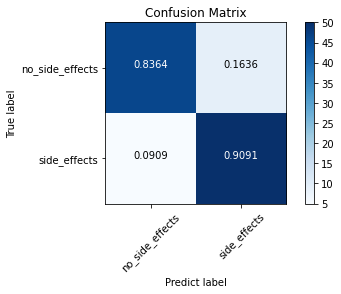

In [43]:
cm_plot_label = ['no_side_effects', 'side_effects']
plot_confusion_matrix(cm, classes=cm_plot_label, normalize=True)

#Save and Load Model


1.model.save()

In [52]:
import os
from tensorflow.keras.models import load_model

In [53]:
if not os.path.isdir("modelcheckpoint"):
  os.mkdir("modelcheckpoint")
  model.save("modelcheckpoint/train_model.h5")

This save function saves:


*   The architecture of the model which used to create a exact model
*   The Weights of the model
*   The Training configuration ( loss, optimizer)
*   The State of the optimizer, allowing to resume training exactly where it is stopped.






In [54]:
new_model = load_model("modelcheckpoint/train_model.h5")

In [55]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

In [71]:
new_model.optimizer

2.model.to_json()

It saves only the architecture of a model and not it's weights or training  configuration.

In [75]:
json_string = model.to_json()
#for yaml
#yaml_string = model.to_yaml()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "

In [76]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

#model_from_yaml(yaml_string)

In [77]:
model_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


3. model.save_weights()

 It will saves only the model weights.

In [78]:
model.save_weights("train_weights_model.h5")

In [79]:
model2 = Sequential([
                    Dense(units=16, input_shape=(1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [80]:
model2.load_weights("train_weights_model.h5")